In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, "../scripts/")
from preprocess import Preproccessing


In [ ]:
df = pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [ ]:
df.head()
to_be_cleaned_df=df[[
    "MSISDN/Number",
    "TCP UL Retrans. Vol (Bytes)",
"TCP DL Retrans. Vol (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Handset Type",
"Handset Manufacturer",
"Avg Bearer TP DL (kbps)",
"Avg Bearer TP UL (kbps)"]]

In [ ]:
to_be_cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                148935 non-null  float64
 1   TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
 2   TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 3   Avg RTT DL (ms)              122172 non-null  float64
 4   Avg RTT UL (ms)              122189 non-null  float64
 5   Handset Type                 149429 non-null  object 
 6   Handset Manufacturer         149429 non-null  object 
 7   Avg Bearer TP DL (kbps)      150000 non-null  float64
 8   Avg Bearer TP UL (kbps)      150000 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.3+ MB


In [ ]:
to_be_cleaned_df["TCP UL Retrans. Vol (Bytes)"]=to_be_cleaned_df["TCP UL Retrans. Vol (Bytes)"].fillna(to_be_cleaned_df["TCP UL Retrans. Vol (Bytes)"].mean())
to_be_cleaned_df["TCP DL Retrans. Vol (Bytes)"]=to_be_cleaned_df["TCP DL Retrans. Vol (Bytes)"].fillna(to_be_cleaned_df["TCP DL Retrans. Vol (Bytes)"].mean())
to_be_cleaned_df["Avg RTT DL (ms)"]=to_be_cleaned_df["Avg RTT DL (ms)"].fillna(to_be_cleaned_df["Avg RTT UL (ms)"].mean())
to_be_cleaned_df["Avg RTT UL (ms)"]=to_be_cleaned_df["Avg RTT UL (ms)"].fillna(to_be_cleaned_df["Avg RTT UL (ms)"].mean())
to_be_cleaned_df["Avg Bearer TP DL (kbps)"]=to_be_cleaned_df["Avg Bearer TP DL (kbps)"].fillna(to_be_cleaned_df["Avg Bearer TP DL (kbps)"].mean())
to_be_cleaned_df["Avg Bearer TP UL (kbps)"]=to_be_cleaned_df["Avg Bearer TP UL (kbps)"].fillna(
    to_be_cleaned_df["Avg Bearer TP UL (kbps)"].mean()
)



C:\Users\hp\AppData\Local\Temp\ipykernel_15460\4178817808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_cleaned_df["TCP UL Retrans. Vol (Bytes)"]=to_be_cleaned_df["TCP UL Retrans. Vol (Bytes)"].fillna(to_be_cleaned_df["TCP UL Retrans. Vol (Bytes)"].mean())
C:\Users\hp\AppData\Local\Temp\ipykernel_15460\4178817808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_cleaned_df["TCP DL Retrans. Vol (Bytes)"]=to_be_cleaned_df["TCP DL Retrans. Vol (Bytes)"].fillna(to_be_cleaned_df["TCP DL Retra

In [ ]:
to_be_cleaned_df.loc[to_be_cleaned_df["Handset Type"] == "undefined"]=to_be_cleaned_df.loc[to_be_cleaned_df["Handset Type"] == "undefined"].replace("undefined",np.NaN)
to_be_cleaned_df.loc[
    to_be_cleaned_df["Handset Manufacturer"] == "undefined"
] = to_be_cleaned_df.loc[to_be_cleaned_df["Handset Manufacturer"] == "undefined"].replace(
    "undefined", np.NaN
)


In [ ]:
to_be_cleaned_df["Handset Type"] = to_be_cleaned_df["Handset Type"].fillna(
    to_be_cleaned_df["Handset Type"].mode()[0]
)

to_be_cleaned_df["Handset Manufacturer"] = to_be_cleaned_df[
    "Handset Manufacturer"
].fillna(to_be_cleaned_df["Handset Manufacturer"].mode()[0])

cleaned_data=to_be_cleaned_df


C:\Users\hp\AppData\Local\Temp\ipykernel_15460\1729891655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_cleaned_df["Handset Type"] = to_be_cleaned_df["Handset Type"].fillna(
C:\Users\hp\AppData\Local\Temp\ipykernel_15460\1729891655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_cleaned_df["Handset Manufacturer"] = to_be_cleaned_df[


In [ ]:
cleaned_data.to_csv("../data/experience-analytics.csv")

In [3]:
clean_df=pd.read_csv("../data/experience-analytics.csv")

In [4]:
preprocessor = Preproccessing(clean_df)


In [5]:
arr=["TCP UL Retrans. Vol (Bytes)",
"TCP DL Retrans. Vol (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Handset Type",
"Handset Manufacturer",
"Avg Bearer TP DL (kbps)",
"Avg Bearer TP UL (kbps)"]


newdf=preprocessor.get_aggrigate_sum(arr)
newdf["MSISDN/Number"]=clean_df["MSISDN/Number"]

newdf.head()

,TCP UL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Handset Manufacturer,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),MSISDN/Number
0,759658.664811,2.080991e+07,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,Huawei,37.0,39.0,3.366496e+10
1,759658.664811,2.080991e+07,30.000000,1.000000,Apple iPhone 7 (A1778),Apple,48.0,51.0,3.368185e+10
2,759658.664811,2.080991e+07,17.662883,17.662883,Huawei B528S-23A,Apple,48.0,49.0,3.376063e+10
3,759658.664811,1.066000e+03,69.000000,15.000000,Apple iPhone 5S (A1457),Apple,204.0,44.0,3.375034e+10
4,780860.664811,3.015954e+07,114.000000,5.000000,Apple iPhone Se (A1723)Apple iPhone Se (A1723),AppleApple,40395.0,16449.0,3.369980e+10


In [6]:

agg_df=pd.DataFrame()
agg_df["MSISDN/Number"] = newdf["MSISDN/Number"]
agg_df["TCP UL/DL (Bytes)"]=newdf["TCP UL Retrans. Vol (Bytes)"]+newdf["TCP DL Retrans. Vol (Bytes)"]
agg_df["Avg RTT UL/DL (ms)"]=newdf["Avg RTT DL (ms)"]+newdf["Avg RTT UL (ms)"]
agg_df["Avg Bearer UL/DL (kbps)"]=newdf["Avg Bearer TP DL (kbps)"]+newdf["Avg Bearer TP UL (kbps)"]
agg_df["Handset Type"]=newdf["Handset Type"]

agg_df


,MSISDN/Number,TCP UL/DL (Bytes),Avg RTT UL/DL (ms),Avg Bearer UL/DL (kbps),Handset Type
0,3.366496e+10,2.156957e+07,46.000000,76.0,Huawei P20 Lite Huawei Nova 3E
1,3.368185e+10,2.156957e+07,31.000000,99.0,Apple iPhone 7 (A1778)
2,3.376063e+10,2.156957e+07,35.325766,97.0,Huawei B528S-23A
3,3.375034e+10,7.607247e+05,84.000000,248.0,Apple iPhone 5S (A1457)
4,3.369980e+10,3.094040e+07,119.000000,56844.0,Apple iPhone Se (A1723)Apple iPhone Se (A1723)
...,...,...,...,...,...
106851,3.365192e+10,2.180450e+05,52.000000,10365.0,Huawei Honor 9 Lite
106852,3.366255e+10,2.156957e+07,40.000000,116.0,Apple iPhone 8 Plus (A1897)
106853,3.366880e+10,2.156957e+07,35.325766,1.0,Quectel Wireless. Quectel Ec25-E
106854,3.378323e+10,2.156957e+07,35.325766,33.0,Huawei B525S-23A


In [7]:
print("\nTop 10\n")
print(agg_df.sort_values(by="TCP UL/DL (Bytes)",ascending=False).head(10)[["MSISDN/Number","TCP UL/DL (Bytes)"]])
print("\nBottom 10\n")
print(agg_df.sort_values(by="TCP UL/DL (Bytes)",ascending=False).tail(10)[["MSISDN/Number","TCP UL/DL (Bytes)"]])


Top 10

       MSISDN/Number  TCP UL/DL (Bytes)
66860   3.365959e+10       8.354209e+09
34123   3.363520e+10       7.941860e+09
42366   3.361551e+10       7.374899e+09
94681   3.364256e+10       6.043978e+09
98213   3.361407e+10       5.879989e+09
25774   3.366190e+10       5.593366e+09
51638   3.365067e+10       5.566929e+09
70913   3.361255e+10       5.195785e+09
99929   3.362505e+10       5.179459e+09
31965   3.376130e+10       5.165857e+09

Bottom 10

        MSISDN/Number  TCP UL/DL (Bytes)
89395    3.360500e+10              182.0
78100    3.365909e+10              179.0
105775   3.369985e+10              177.0
25863    3.364921e+10              176.0
102198   3.366913e+10              176.0
2177     3.369856e+10              143.0
13546    3.365916e+10              134.0
96977    3.365057e+10              129.0
6359     3.366424e+10              128.0
23472    3.362856e+10               97.0


In [8]:

print("\nTop 10\n")
print(
    agg_df.sort_values(by="Avg RTT UL/DL (ms)", ascending=False).head(10)[
        ["MSISDN/Number", "Avg RTT UL/DL (ms)"]
    ]
)
print("\nBottom 10\n")
print(
    agg_df.sort_values(by="Avg RTT UL/DL (ms)", ascending=False).tail(10)[
        ["MSISDN/Number", "Avg RTT UL/DL (ms)"]
    ]
)



Top 10

        MSISDN/Number  Avg RTT UL/DL (ms)
47983    3.366565e+10             96924.0
41944    3.376360e+10             64670.0
80249    3.368373e+10             54848.0
85683    3.378150e+10             46021.0
96414    3.366695e+10             37084.0
70142    3.366366e+10             36304.0
93844    3.365084e+10             27278.0
1713     3.365971e+10             26300.0
74240    3.365834e+10             25715.0
104325   3.361398e+10             25388.0

Bottom 10

       MSISDN/Number  Avg RTT UL/DL (ms)
17863   3.365065e+10                10.0
74434   3.367503e+10                 9.0
3882    3.365983e+10                 9.0
21980   3.361799e+10                 8.0
69662   3.361603e+10                 6.0
36039   3.366570e+10                 5.0
83396   3.365904e+10                 4.0
39066   3.376222e+10                 2.0
28878   3.366883e+10                 0.0
44748   3.376022e+10                 0.0


In [9]:


print("\nTop 10\n")
print(
    agg_df.sort_values(by="Avg Bearer UL/DL (kbps)", ascending=False).head(10)[
        ["MSISDN/Number", "Avg Bearer UL/DL (kbps)"]
    ]
)
print("\nBottom 10\n")
print(
    agg_df.sort_values(by="Avg Bearer UL/DL (kbps)", ascending=False).tail(10)[
        ["MSISDN/Number", "Avg Bearer UL/DL (kbps)"]
    ]
)



Top 10

       MSISDN/Number  Avg Bearer UL/DL (kbps)
97584   3.369965e+10                 902222.0
69910   3.366433e+10                 840424.0
36257   3.366520e+10                 798342.0
73146   3.364999e+10                 690815.0
69020   3.365036e+10                 676858.0
84486   3.375097e+10                 618797.0
13141   3.365094e+10                 564179.0
29313   3.366525e+10                 550352.0
98213   3.361407e+10                 549661.0
60763   3.376170e+10                 530353.0

Bottom 10

        MSISDN/Number  Avg Bearer UL/DL (kbps)
40346    3.367826e+10                      0.0
27067    3.376217e+10                      0.0
19036    3.361837e+10                      0.0
85825    3.367664e+10                      0.0
90941    3.361270e+10                      0.0
103186   3.369884e+10                      0.0
103236   3.376170e+10                      0.0
40785    3.366888e+10                      0.0
71456    3.378151e+10                      0.0
419

In [10]:
# agg_df.groupby(["Handset Type"])[["MSISDN/Number","Avg Bearer UL/DL (kbps)","Handset Type"]].head()
# agg_df
ag=agg_df.groupby(["Handset Type"])["MSISDN/Number","Avg RTT UL/DL (ms)",]
ag.head(50)


C:\Users\hp\AppData\Local\Temp\ipykernel_3688\2791306828.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ag=agg_df.groupby(["Handset Type"])["MSISDN/Number","Avg RTT UL/DL (ms)",]


,MSISDN/Number,Avg RTT UL/DL (ms)
0,3.366496e+10,46.000000
1,3.368185e+10,31.000000
2,3.376063e+10,35.325766
3,3.375034e+10,84.000000
4,3.369980e+10,119.000000
...,...,...
106824,3.376126e+10,35.325766
106825,3.366423e+10,152.000000
106853,3.366880e+10,35.325766
106854,3.378323e+10,35.325766


In [11]:
ag = agg_df.groupby(["Handset Type"])[
    "MSISDN/Number",
    "TCP UL/DL (Bytes)",
]
ag.head(50)


C:\Users\hp\AppData\Local\Temp\ipykernel_3688\419863400.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ag = agg_df.groupby(["Handset Type"])[


,MSISDN/Number,TCP UL/DL (Bytes)
0,3.366496e+10,2.156957e+07
1,3.368185e+10,2.156957e+07
2,3.376063e+10,2.156957e+07
3,3.375034e+10,7.607247e+05
4,3.369980e+10,3.094040e+07
...,...,...
106824,3.376126e+10,2.156957e+07
106825,3.366423e+10,2.156957e+07
106853,3.366880e+10,2.156957e+07
106854,3.378323e+10,2.156957e+07


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

In [13]:
new_df=agg_df[["TCP UL/DL (Bytes)", "Avg RTT UL/DL (ms)", "Avg Bearer UL/DL (kbps)"]]
scaled=MinMaxScaler().fit_transform(agg_df[["TCP UL/DL (Bytes)", "Avg RTT UL/DL (ms)", "Avg Bearer UL/DL (kbps)"]])
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(new_df)
label = kmeans.predict(new_df)
centroids=kmeans.cluster_centers_

df_kclus = pd.DataFrame(new_df)
df_kclus["clusters"] = label
df_kclus.head()

df_kclus.to_csv("../data/std_experience.csv")


In [15]:

centroids_df = pd.DataFrame(
    centroids, columns=["Average RTT", "Average TCP", "Average throughput"]
)
centroids_df.to_csv("../data/centro_experience.csv")


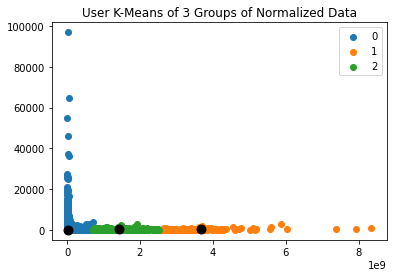

In [16]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
plt.title("User K-Means of 3 Groups of Normalized Data")
for i in u_labels:
    plt.scatter(df_kclus[label == i].iloc[:, 0], df_kclus[label == i].iloc[:, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color="black")
plt.legend()
plt.show()
